In [1]:
from cellulus.utils.utils import extract_data, visualize
from cellulus.utils.create_dicts import (
    create_dataset_dict,
    create_model_dict,
    create_loss_dict,
    create_configs,
)
from cellulus.train import begin_training
import os
from datetime import date

### Download Data

The `TissueNet` dataset, `Version 1.0` was downloaded from the DeepCell website at **[this](https://datasets.deepcell.org/data)** url. <br>The original data contained data for multiple tissue types and was available as numpy zipped files (`*.npz`). <br> We extracted the subset fo data corresponding to `Immune` tissue type, re-saved the dataset as `zarr` files.<br> This data can be downloaded from `zarr_url` to the `data_dir` location, using the `extract_data` method.

In [2]:
data_dir = "./"
project_name = "Immune"

In [3]:
extract_data(
    # zarr_url = 'https://github.com/funkelab/cellulus/releases/download/v0.0.1/Immune.zip',
    zarr_url="https://github.com/lmanan/FSD/releases/download/v0.0.1-tag/Immune.zip",
    data_dir=data_dir,
    project_name=project_name,
)

Directory already exists at the location ./Immune


### Specify object size in pixels

Set `object_size` to be roughly equal to the average height or width of the object. <br>
This parameter will later be used to identify objects which are roughly of this size.

In [4]:
object_size = 32

### Visualize some of the images in the dataset

We randomly choose $5$ images from `val.zarr` and visualize both the channels in the two rows.

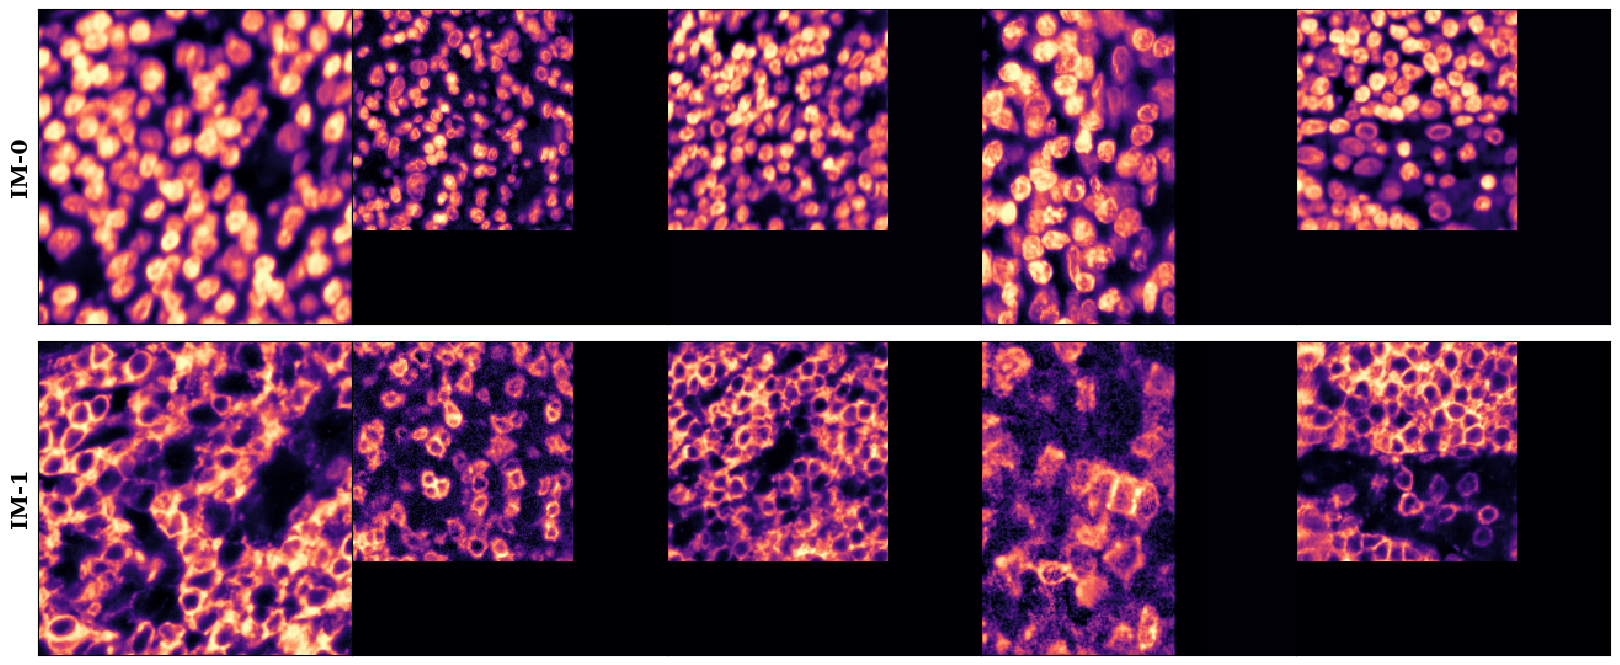

In [5]:
visualize(project_name)

### Create the `train_dataset_dict` dictionary

In [6]:
train_batch_size = 4
train_crop_size = 252

In [7]:
train_dataset_dict = create_dataset_dict(
    data_dir=data_dir,
    project_name=project_name,
    crop_size=train_crop_size,
    batch_size=train_batch_size,
    type="train",
)

`train_dataset_dict` dictionary successfully created with: 
 -- train images accessed from ./Immune/train.zarr, 
 -- batch size set at 4, 
 -- crop size set at 252


### Create the `val_dataset_dict` dictionary

In [8]:
val_batch_size = 4
val_crop_size = 252

In [9]:
val_dataset_dict = create_dataset_dict(
    data_dir=data_dir,
    project_name=project_name,
    crop_size=val_crop_size,
    batch_size=val_batch_size,
    type="val",
)

`val_dataset_dict` dictionary successfully created with: 
 -- val images accessed from ./Immune/val.zarr, 
 -- batch size set at 4, 
 -- crop size set at 252


### Specify model-related parameters

In [10]:
num_input_channels = 2

### Create the `model_dict` dictionary

In [11]:
model_dict = create_model_dict(num_input_channels=num_input_channels)

`model_dict` dictionary successfully created with: 
 -- num of output channels equal to 2, 
 -- num of input channels equal to 2, 
 -- name equal to UNet2D


### Create the `loss_dict` dictionary

In [12]:
loss_dict = create_loss_dict()

`loss_dict` dictionary successfully created with: 
 -- regularization weight equal to 0.000 and temperature equal to 10.000


### Specify training related parameters

In [13]:
n_epochs = 50
save_dir = os.path.join(project_name, date.today().strftime("%d-%m-%Y"))
resume_path = None

### Create the `configs` dictionary

In [14]:
configs = create_configs(
    n_epochs=n_epochs, resume_path=resume_path, save_dir=save_dir, cuda=False
)

`configs` dictionary successfully created with: 
 -- n_epochs equal to 50, 
 -- save_dir equal to Immune/06-06-2023, 
 -- cuda set to False


### Begin training!

Executing the next cell would begin the training.

In [15]:
begin_training(train_dataset_dict, val_dataset_dict, model_dict, loss_dict, configs)

2D data loader created! Accessing data from ./Immune/train.zarr/
Number of images in the `./Immune/train.zarr` directory is 457
2D data loader created! Accessing data from ./Immune/val.zarr/
Number of images in the `./Immune/val.zarr` directory is 630
Created OCE Loss-object with temperature=10.0 and regularization=1e-05
Created logger with keys:  ('train', 'val', 'iou')
Starting epoch 0
learning rate: 0.0005


  0%|                                                                                                          | 0/114 [00:00<?, ?it/s]

tensor([[[[ 0.0460,  0.0460,  0.0460,  ...,  0.0460,  0.0460,  0.0460],
          [ 0.0460,  0.0460,  0.0460,  ...,  0.0460,  0.0460,  0.0460],
          [ 0.0460,  0.0460,  0.0460,  ...,  0.0460,  0.0460,  0.0460],
          ...,
          [ 0.0460,  0.0460,  0.0460,  ...,  0.0460,  0.0460,  0.0460],
          [ 0.0460,  0.0460,  0.0460,  ...,  0.0460,  0.0460,  0.0460],
          [ 0.0460,  0.0460,  0.0460,  ...,  0.0460,  0.0460,  0.0460]],

         [[-0.1148, -0.1148, -0.1148,  ..., -0.1149, -0.1149, -0.1149],
          [-0.1149, -0.1148, -0.1148,  ..., -0.1149, -0.1149, -0.1149],
          [-0.1149, -0.1148, -0.1148,  ..., -0.1149, -0.1149, -0.1149],
          ...,
          [-0.1149, -0.1149, -0.1149,  ..., -0.1149, -0.1149, -0.1149],
          [-0.1149, -0.1149, -0.1149,  ..., -0.1149, -0.1149, -0.1149],
          [-0.1149, -0.1149, -0.1149,  ..., -0.1149, -0.1149, -0.1149]]],


        [[[ 0.0460,  0.0460,  0.0460,  ...,  0.0460,  0.0460,  0.0460],
          [ 0.0460,  0.0460,

  0%|                                                                                                          | 0/114 [00:14<?, ?it/s]


IndexError: index 241 is out of bounds for dimension 1 with size 236